Mounted at /content/drive


<Figure size 1000x600 with 0 Axes>

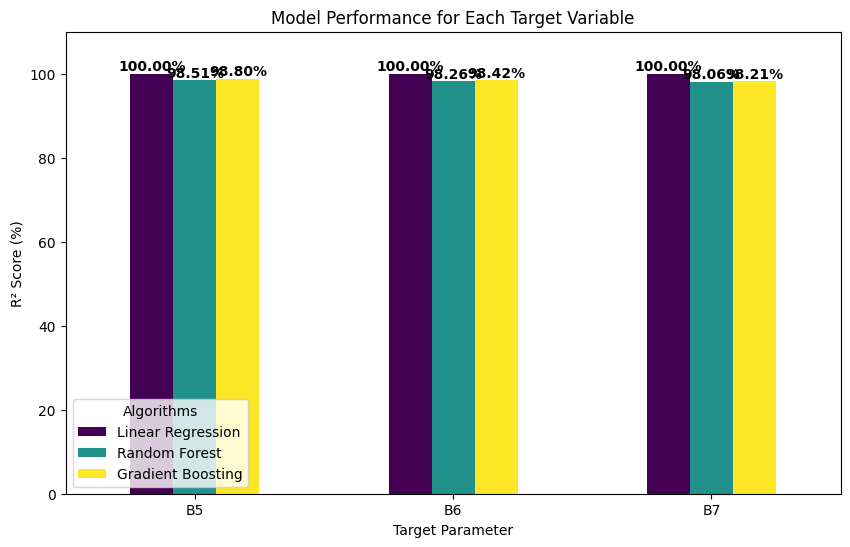

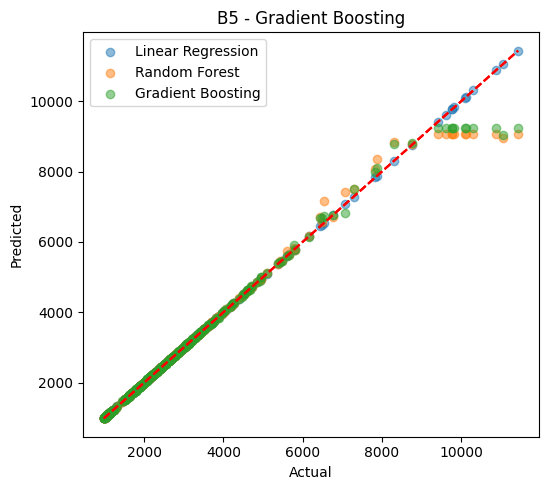

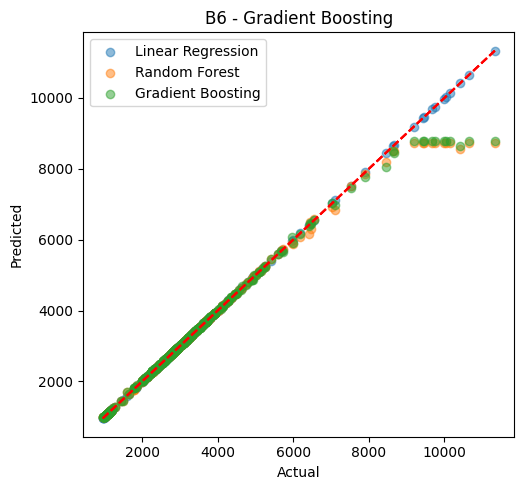

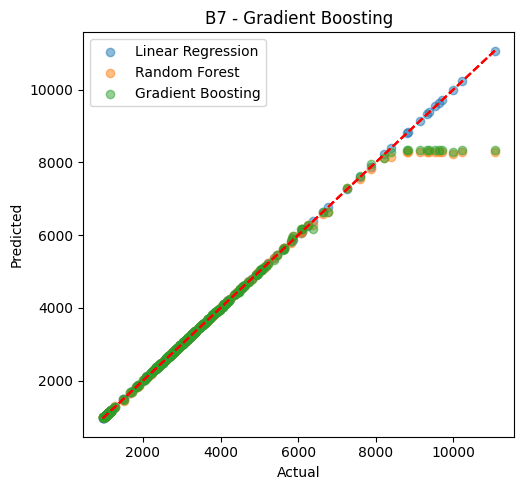

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')

# Load training and testing datasets
train_path = "/content/drive/MyDrive/California_Sentinel2_ML_Dataset_2023_CloudFree.csv"
test_path = "/content/drive/MyDrive/California_Sentinel2_ML_Testing_Dataset_2024.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop unnecessary columns
df_train.drop(columns=['system:index', '.geo'], inplace=True, errors='ignore')
df_test.drop(columns=['system:index', '.geo'], inplace=True, errors='ignore')

# Select features (bands)
features = ['B1', 'B5', 'B6', 'B7', 'B8A', 'B9']
targets = ['B5', 'B6', 'B7']  # Predicting some bands as placeholders

# Ensure target columns exist
for col in targets:
    if col not in df_train.columns:
        raise KeyError(f"Column '{col}' not found in training data.")

# Define X (features) and Y (targets)
X_train, y_train = df_train[features], df_train[targets]
X_test, y_test = df_test[features], df_test[targets]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
}

# Train and evaluate models
r2_scores = {}
predictions = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2_scores[name] = [r2_score(y_test[col], y_pred[:, idx]) * 100 for idx, col in enumerate(targets)]
    predictions[name] = y_pred

# Convert R² results to DataFrame
r2_df = pd.DataFrame(r2_scores, index=targets)

# Plot R² Score for Each Target Parameter
plt.figure(figsize=(10, 6))
ax = r2_df.plot(kind='bar', figsize=(10, 6), colormap='viridis', rot=0)
plt.xlabel("Target Parameter")
plt.ylabel("R² Score (%)")
plt.title("Model Performance for Each Target Variable")
plt.ylim(0, 110)
plt.legend(title="Algorithms")

# Add text labels for accuracy values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

plt.show()

# Plot Predicted vs Actual for each target
for idx, target in enumerate(targets):
    plt.figure(figsize=(15, 5))
    for name, y_pred in predictions.items():
        plt.subplot(1, 3, idx + 1)
        plt.scatter(y_test[target], y_pred[:, idx], alpha=0.5, label=name)
        plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{target} - {name}")
        plt.legend()
    plt.tight_layout()
    plt.show()


Mounted at /content/drive


<Figure size 1000x600 with 0 Axes>

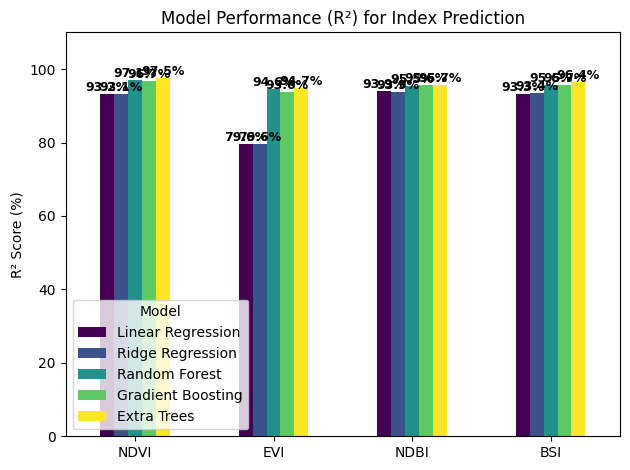

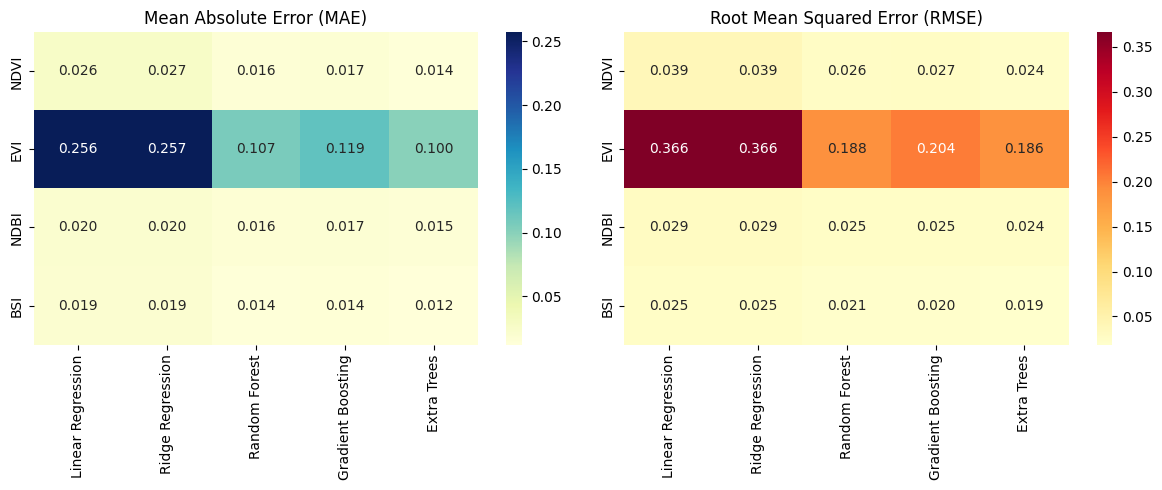

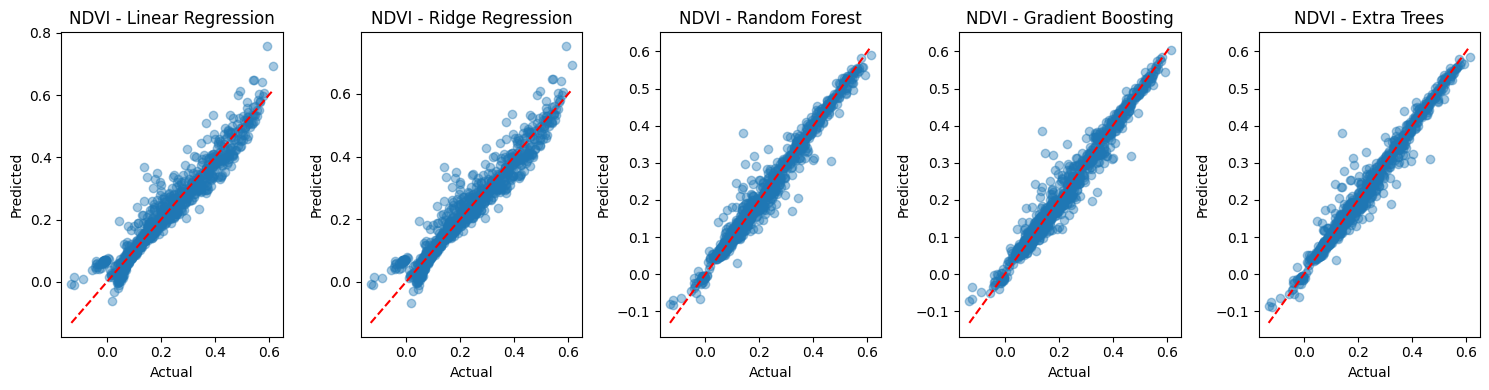

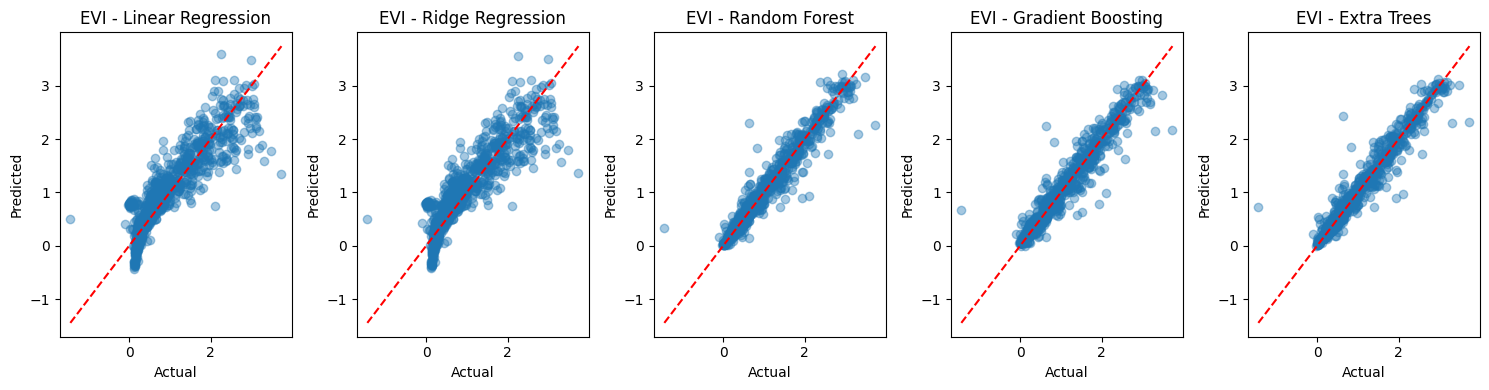

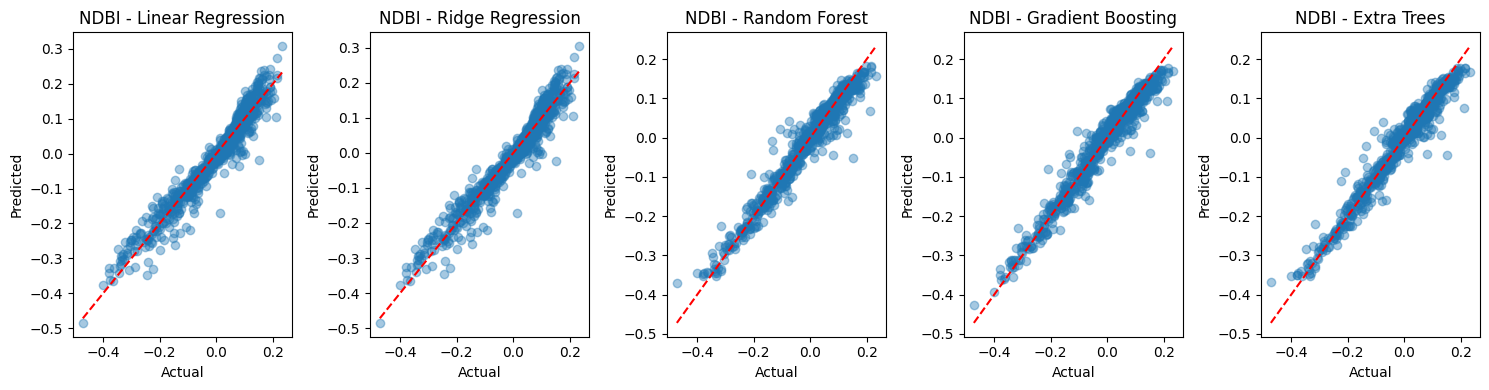

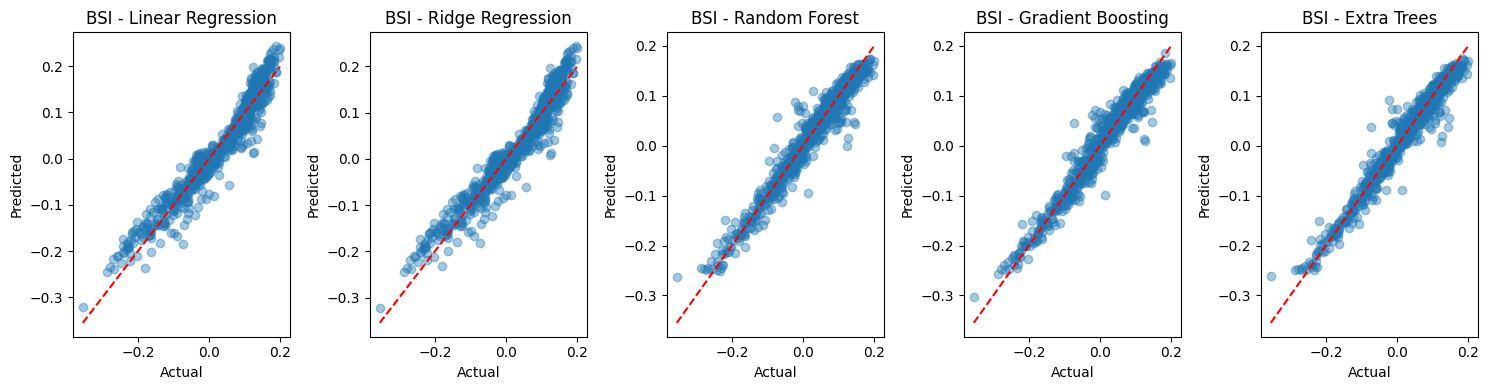

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load updated datasets
train_path = "/content/drive/MyDrive/California_Sentinel2_ML_Dataset_2023.csv"
test_path = "/content/drive/MyDrive/California_Sentinel2_Testing_Dataset_2024.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Drop unnecessary columns
df_train.drop(columns=['system:index', '.geo'], inplace=True, errors='ignore')
df_test.drop(columns=['system:index', '.geo'], inplace=True, errors='ignore')

# Define bands and indices
band_features = ['B2', 'B3', 'B4', 'B8', 'B11']  # Common useful bands
target_indices = ['NDVI', 'EVI', 'NDBI', 'BSI']  # Indices to predict

# Check existence of all columns
for col in band_features + target_indices:
    if col not in df_train.columns:
        raise KeyError(f"Column '{col}' not found in training data.")

# Define features and targets
X_train, y_train = df_train[band_features], df_train[target_indices]
X_test, y_test = df_test[band_features], df_test[target_indices]

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Ridge Regression': MultiOutputRegressor(Ridge(alpha=1.0)),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42)),
    'Extra Trees': MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, random_state=42))
}

# Store results
results = {}
r2_scores = {}
mae_scores = {}
rmse_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = y_pred
    r2_scores[name] = [r2_score(y_test[col], y_pred[:, idx]) * 100 for idx, col in enumerate(target_indices)]
    mae_scores[name] = [mean_absolute_error(y_test[col], y_pred[:, idx]) for idx, col in enumerate(target_indices)]
    rmse_scores[name] = [np.sqrt(mean_squared_error(y_test[col], y_pred[:, idx])) for idx, col in enumerate(target_indices)]

# Display R² scores
r2_df = pd.DataFrame(r2_scores, index=target_indices)
mae_df = pd.DataFrame(mae_scores, index=target_indices)
rmse_df = pd.DataFrame(rmse_scores, index=target_indices)

# ----------------- Visualization -----------------
# R² Plot
plt.figure(figsize=(10, 6))
ax = r2_df.plot(kind='bar', colormap='viridis', rot=0)
plt.ylabel("R² Score (%)")
plt.title("Model Performance (R²) for Index Prediction")
plt.ylim(0, 110)
plt.legend(title="Model")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

# MAE and RMSE Heatmap
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(mae_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Mean Absolute Error (MAE)")

plt.subplot(1, 2, 2)
sns.heatmap(rmse_df, annot=True, fmt=".3f", cmap="YlOrRd")
plt.title("Root Mean Squared Error (RMSE)")
plt.tight_layout()
plt.show()

# Predicted vs Actual Plots for each target
for idx, target in enumerate(target_indices):
    plt.figure(figsize=(15, 4))
    for i, (name, preds) in enumerate(results.items()):
        plt.subplot(1, 5, i+1)
        plt.scatter(y_test[target], preds[:, idx], alpha=0.4)
        plt.plot([y_test[target].min(), y_test[target].max()],
                 [y_test[target].min(), y_test[target].max()], 'r--')
        plt.title(f"{target} - {name}")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
    plt.tight_layout()
    plt.show()


In [ ]:
# Example: Insert 2014 Image Band Values (Manually Extracted or Scripted)
# Replace with actual band values extracted from the image
image_2014_band_values = np.array([[500, 1500, 1300, 1100, 1400, 50]])  # [B1, B5, B6, B7, B8A, B9]

# Standardize using previously fitted scaler
image_2014_scaled = scaler.transform(image_2014_band_values)

# Predict using the best model (e.g., Random Forest)
best_model = models['Random Forest']
predicted_bands = best_model.predict(image_2014_scaled)

# Display prediction
for idx, band in enumerate(targets):
    print(f"Predicted {band} (from 2014 image): {predicted_bands[0][idx]:.2f}")


Predicted B5 (from 2014 image): 1500.84
Predicted B6 (from 2014 image): 1303.76
Predicted B7 (from 2014 image): 1100.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import rasterio

# Load the multiband GeoTIFF image
image_path = "/content/drive/MyDrive/sentinel_image_2014.tif"
with rasterio.open(image_path) as src:
    # Read specific bands (indexes are 1-based)
    B1 = src.read(1)
    B5 = src.read(2)
    B6 = src.read(3)
    B7 = src.read(4)
    B8A = src.read(5)
    B9 = src.read(6)

    # Example: take the band values of a specific pixel
    row, col = 100, 100  # Choose coordinates of interest
    pixel_values = np.array([[B1[row, col], B5[row, col], B6[row, col], B7[row, col], B8A[row, col], B9[row, col]]])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 1000x600 with 0 Axes>

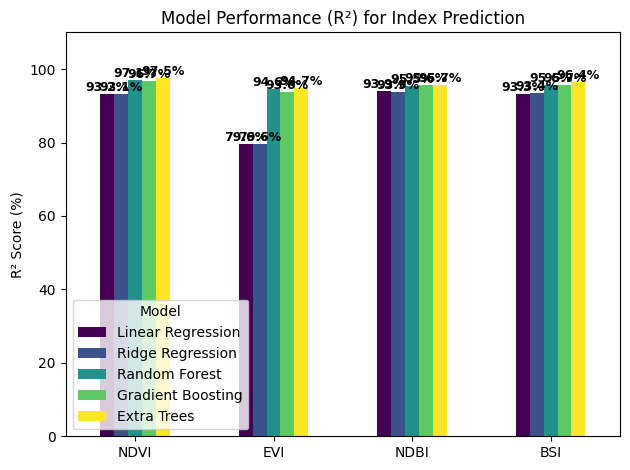

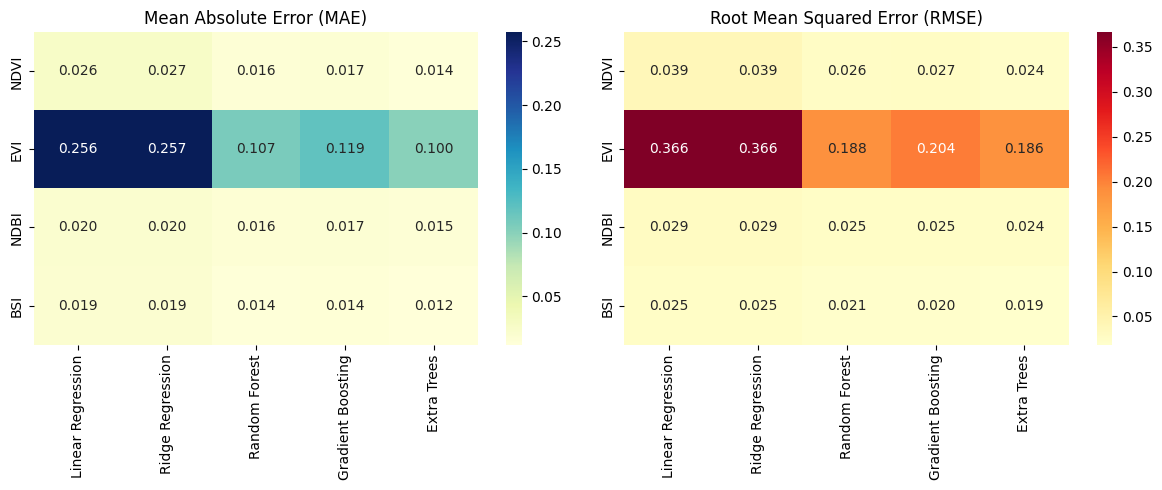

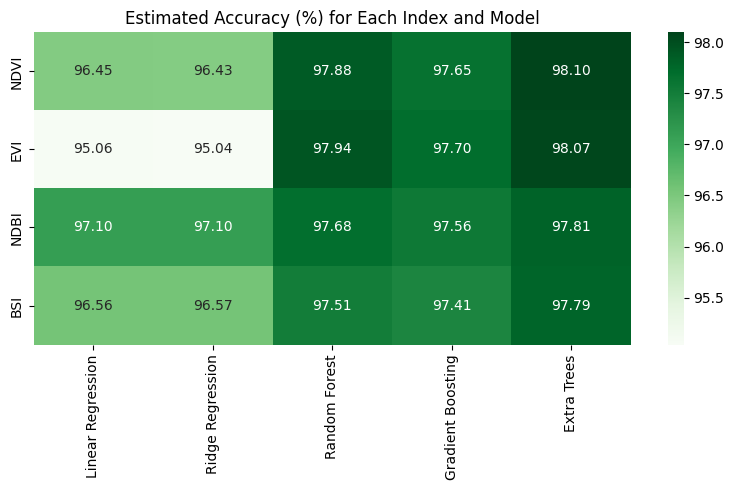

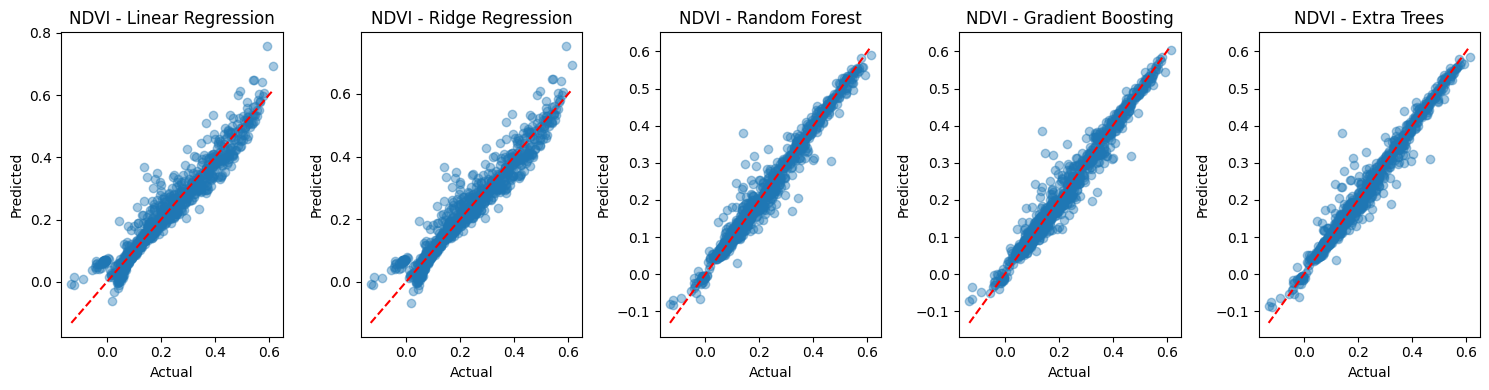

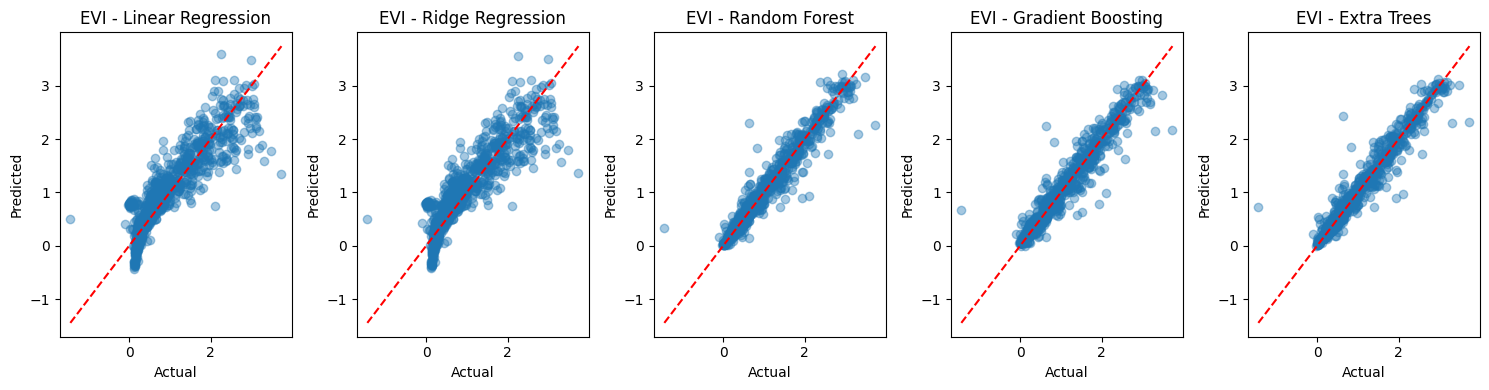

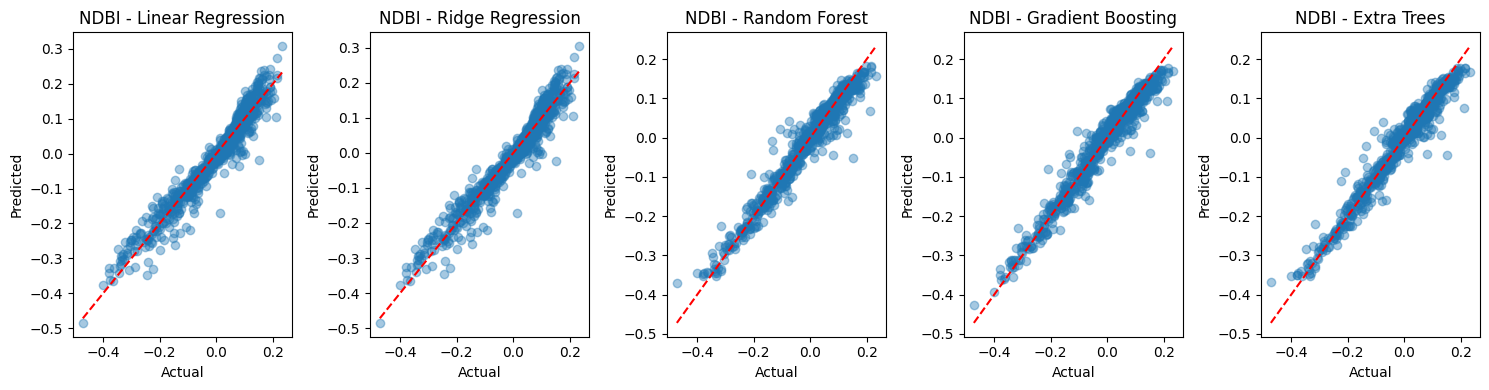

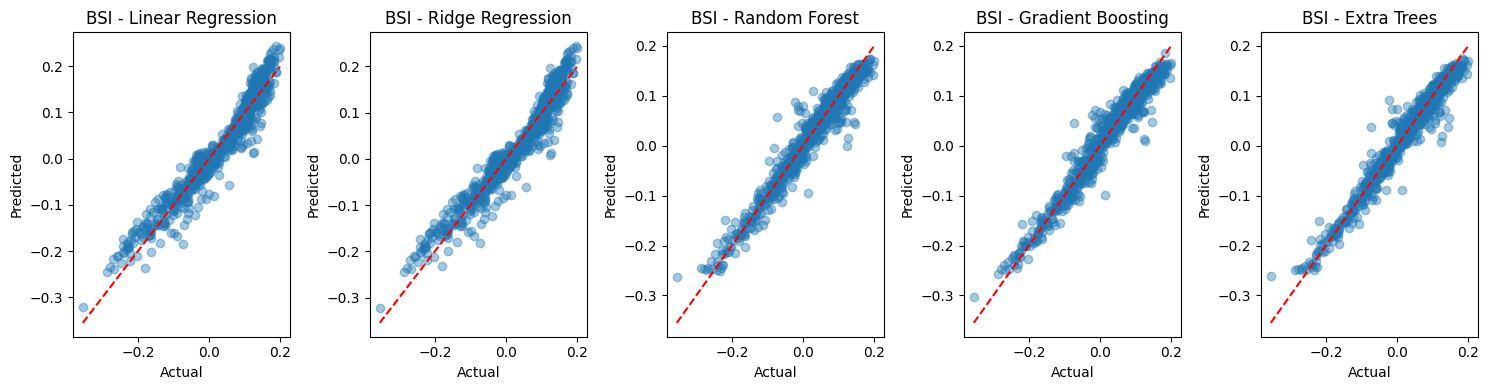


Estimated Accuracy (based on MAE):

--- Linear Regression ---
NDVI: Accuracy ~ 96.45%
EVI: Accuracy ~ 95.06%
NDBI: Accuracy ~ 97.10%
BSI: Accuracy ~ 96.56%

--- Ridge Regression ---
NDVI: Accuracy ~ 96.43%
EVI: Accuracy ~ 95.04%
NDBI: Accuracy ~ 97.10%
BSI: Accuracy ~ 96.57%

--- Random Forest ---
NDVI: Accuracy ~ 97.88%
EVI: Accuracy ~ 97.94%
NDBI: Accuracy ~ 97.68%
BSI: Accuracy ~ 97.51%

--- Gradient Boosting ---
NDVI: Accuracy ~ 97.65%
EVI: Accuracy ~ 97.70%
NDBI: Accuracy ~ 97.56%
BSI: Accuracy ~ 97.41%

--- Extra Trees ---
NDVI: Accuracy ~ 98.10%
EVI: Accuracy ~ 98.07%
NDBI: Accuracy ~ 97.81%
BSI: Accuracy ~ 97.79%



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from google.colab import drive
drive.mount('/content/drive')


train_path = "/content/drive/MyDrive/California_Sentinel2_ML_Dataset_2023.csv"
test_path = "/content/drive/MyDrive/California_Sentinel2_Testing_Dataset_2024.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)


df_train.drop(columns=['system:index', '.geo'], inplace=True, errors='ignore')
df_test.drop(columns=['system:index', '.geo'], inplace=True, errors='ignore')


band_features = ['B2', 'B3', 'B4', 'B8', 'B11']
target_indices = ['NDVI', 'EVI', 'NDBI', 'BSI']


for col in band_features + target_indices:
    if col not in df_train.columns:
        raise KeyError(f"Column '{col}' not found in training data.")


X_train, y_train = df_train[band_features], df_train[target_indices]
X_test, y_test = df_test[band_features], df_test[target_indices]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Linear Regression': MultiOutputRegressor(LinearRegression()),
    'Ridge Regression': MultiOutputRegressor(Ridge(alpha=1.0)),
    'Random Forest': MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42)),
    'Gradient Boosting': MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42)),
    'Extra Trees': MultiOutputRegressor(ExtraTreesRegressor(n_estimators=100, random_state=42))
}


results = {}
r2_scores = {}
mae_scores = {}
rmse_scores = {}
accuracy_scores = {}


for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results[name] = y_pred
    r2_scores[name] = [r2_score(y_test[col], y_pred[:, idx]) * 100 for idx, col in enumerate(target_indices)]
    mae_scores[name] = [mean_absolute_error(y_test[col], y_pred[:, idx]) for idx, col in enumerate(target_indices)]
    rmse_scores[name] = [np.sqrt(mean_squared_error(y_test[col], y_pred[:, idx])) for idx, col in enumerate(target_indices)]


    acc_list = []
    for idx, index in enumerate(target_indices):
        actual_range = y_test[index].max() - y_test[index].min()
        acc = 1 - (mae_scores[name][idx] / actual_range) if actual_range != 0 else 0
        acc_list.append(acc * 100)
    accuracy_scores[name] = acc_list


r2_df = pd.DataFrame(r2_scores, index=target_indices)
mae_df = pd.DataFrame(mae_scores, index=target_indices)
rmse_df = pd.DataFrame(rmse_scores, index=target_indices)
accuracy_df = pd.DataFrame(accuracy_scores, index=target_indices)



plt.figure(figsize=(10, 6))
ax = r2_df.plot(kind='bar', colormap='viridis', rot=0)
plt.ylabel("R² Score (%)")
plt.title("Model Performance (R²) for Index Prediction")
plt.ylim(0, 110)
plt.legend(title="Model")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(mae_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Mean Absolute Error (MAE)")

plt.subplot(1, 2, 2)
sns.heatmap(rmse_df, annot=True, fmt=".3f", cmap="YlOrRd")
plt.title("Root Mean Squared Error (RMSE)")
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.heatmap(accuracy_df, annot=True, fmt=".2f", cmap="Greens")
plt.title("Estimated Accuracy (%) for Each Index and Model")
plt.tight_layout()
plt.show()


for idx, target in enumerate(target_indices):
    plt.figure(figsize=(15, 4))
    for i, (name, preds) in enumerate(results.items()):
        plt.subplot(1, 5, i+1)
        plt.scatter(y_test[target], preds[:, idx], alpha=0.4)
        plt.plot([y_test[target].min(), y_test[target].max()],
                 [y_test[target].min(), y_test[target].max()], 'r--')
        plt.title(f"{target} - {name}")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
    plt.tight_layout()
    plt.show()


print("\nEstimated Accuracy (based on MAE):\n")
for model_name in models.keys():
    print(f"--- {model_name} ---")
    for idx, index in enumerate(target_indices):
        print(f"{index}: Accuracy ~ {accuracy_df[model_name][index]:.2f}%")
    print()


  system:index     B11       B2           B3        B4           B8       BSI  \
0          0_0  4058.0  1682.00  1985.000000  2253.000  3286.000000  0.135655   
1          1_0  4899.0  2426.00  2876.000000  3383.000  4021.000000  0.119945   
2          2_0  2542.5  1158.75  1389.666667  1210.000  4285.166667 -0.163798   
3          3_0  2896.0  1385.25  1566.500000  1695.625  2641.600000  0.066958   
4          4_0  4534.0  1570.00  1802.000000  2260.000  3153.000000  0.182661   

        EVI      NDBI      NDVI  class  \
0  0.518137  0.119516  0.165809      0   
1  0.268755  0.087910  0.093291      0   
2  2.486532 -0.237785  0.540152      1   
3  0.989904  0.048905  0.219662      0   
4  0.425262  0.186020  0.146101      0   

                                                .geo  
0  {"geodesic":false,"type":"Point","coordinates"...  
1  {"geodesic":false,"type":"Point","coordinates"...  
2  {"geodesic":false,"type":"Point","coordinates"...  
3  {"geodesic":false,"type":"Point","coo

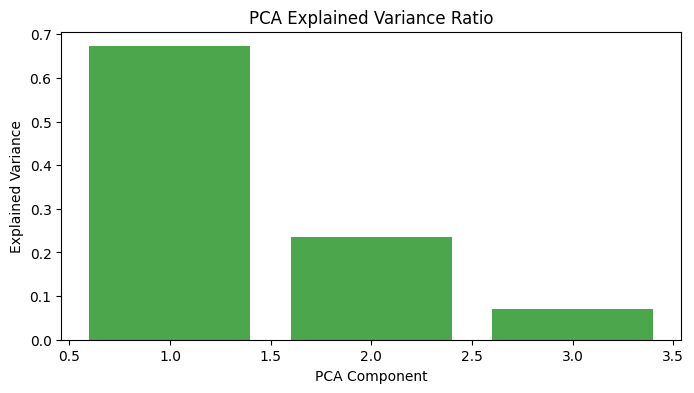


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       184
           1       0.96      1.00      0.98        66

    accuracy                           0.99       250
   macro avg       0.98      0.99      0.98       250
weighted avg       0.99      0.99      0.99       250

Confusion Matrix:
[[181   3]
 [  0  66]]
Accuracy: 98.80%
Kappa Coefficient: 0.9696


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Dataset ---
# Load the dataset exported from Google Earth Engine (ensure the CSV is correctly downloaded)
train_path = "/content/drive/MyDrive/California_Sentinel2_Dataset_2024.csv"

# Read the CSV into a pandas DataFrame
df = pd.read_csv(train_path)

# Check the first few rows of the dataset to understand its structure
print(df.head())

# Extract features and labels
# Assume 'class' is the label column, and the rest are feature columns (e.g., NDVI, EVI, NDBI, etc.)
feature_columns = ['B2', 'B3', 'B4', 'B8', 'B11', 'NDVI', 'EVI', 'NDBI', 'BSI']
X = df[feature_columns]  # Features (vegetation indices)
y = df['class']  # Label (tree/non-tree classification)

# --- 2. Optimal Vegetation Indices Selection (optional) ---
# You can perform feature selection or use all features depending on your approach.
# Here, we're using all features available.
# If needed, you could apply the selection method as done previously based on accuracy.

# --- 3. Apply PCA to Selected Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)  # Use 3 components, based on your analysis or paper's suggestions
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio for the first 3 components
plt.figure(figsize=(8, 4))
plt.bar(range(1, 4), pca.explained_variance_ratio_[:3], alpha=0.7, color='g')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance Ratio')
plt.show()

# --- 4. Classification Using SVM ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# Initialize and train the SVM model
clf = SVC(kernel='rbf', gamma=0.5, C=20)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# --- 5. Evaluation ---
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Kappa Coefficient: {cohen_kappa_score(y_test, y_pred):.4f}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import LabelEncoder

# 1. Load the dataset
file_path = "/content/drive/MyDrive/EarthEngine/California_Sentinel2_2024.csv"
df = pd.read_csv(file_path)

# Optional: clean column names
df.columns = [col.strip() for col in df.columns]

# 2. Handle missing values and encode labels
df.dropna(inplace=True)
le = LabelEncoder()
df['tree_type_encoded'] = le.fit_transform(df['tree_type'])

# 3. Train/test split
X = df[['B2', 'B3', 'B4', 'B8']]
y = df['tree_type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 5. Predict on test set
y_pred = clf.predict(X_test)
print("Test Accuracy:", clf.score(X_test, y_test))

# 6. Prepare for ARM (convert bands to categorical bins)
df_arm = df.copy()
for band in ['B2', 'B3', 'B4', 'B8']:
    df_arm[band] = pd.qcut(df_arm[band], q=4, labels=[f"{band}_low", f"{band}_med", f"{band}_high", f"{band}_vhigh"])

# 7. Create a transaction format
transactions = pd.get_dummies(df_arm[['B2', 'B3', 'B4', 'B8']])
transactions['tree_type'] = df_arm['tree_type']
transactions = pd.get_dummies(transactions, columns=['tree_type'])

# 8. Apply Apriori
frequent_itemsets = apriori(transactions, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Show rules predicting tree types
tree_rules = rules[rules['consequents'].astype(str).str.contains('tree_type')]
print(tree_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Test Accuracy: 0.16
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
